<a href="https://colab.research.google.com/github/saksham657/Summer-Microcredential/blob/main/InClassAssignment(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/saksham657/Summer-Microcredential/main/iris%20(1).csv')

In [57]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


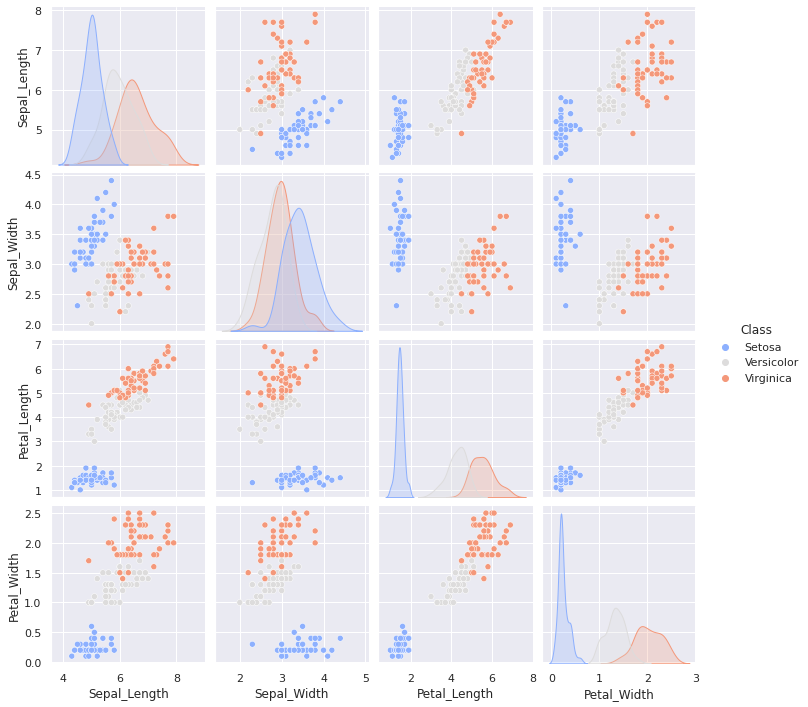

In [58]:
sns.pairplot(df, hue='Class', palette = 'coolwarm')

In [59]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [60]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
df['Class'] = df['Class'].replace(['Setosa'],'0')

In [99]:
df['Class'] = df['Class'].replace(['Versicolor'],'1')

In [98]:
df['Class'] = df['Class'].replace(['Virginica'],'2')

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(df.drop('Class', axis = 1))

StandardScaler()

In [65]:
scaled_features = scaler.transform(df.drop('Class', axis = 1))

In [66]:
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [67]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [68]:
df_feat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [69]:
df_feat.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Class'], test_size = 0.33)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [73]:
pred = knn.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(confusion_matrix(y_test, pred))

[[20  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
  Versicolor       0.82      0.93      0.87        15
   Virginica       0.92      0.80      0.86        15

    accuracy                           0.92        50
   macro avg       0.92      0.91      0.91        50
weighted avg       0.92      0.92      0.92        50



In [77]:
error_rate = []

# Will take some time
for i in range(1, 40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [78]:
error_rate

[0.08,
 0.08,
 0.08,
 0.1,
 0.06,
 0.08,
 0.06,
 0.08,
 0.08,
 0.08,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.14,
 0.16,
 0.16,
 0.14,
 0.14,
 0.14,
 0.14]

Text(0, 0.5, 'Error Rate')

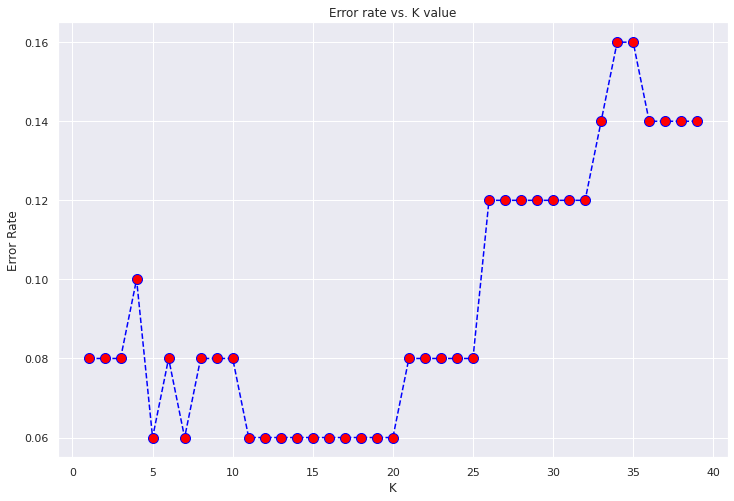

In [79]:
plt.figure(figsize = (12,8))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
knn = KNeighborsClassifier(n_neighbors=7)

In [81]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [82]:
print('With k = 7')
print(confusion_matrix(y_test, pred))

With k = 7
[[20  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
  Versicolor       0.83      1.00      0.91        15
   Virginica       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.93        50
weighted avg       0.95      0.94      0.94        50



In [84]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 8')
print(confusion_matrix(y_test, pred))

With k = 8
[[20  0  0]
 [ 0 15  0]
 [ 0  4 11]]


In [85]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
  Versicolor       0.79      1.00      0.88        15
   Virginica       1.00      0.73      0.85        15

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.91        50
weighted avg       0.94      0.92      0.92        50



# Task 1: Identify the problem

In this notebook, I will conduct a detailed and conclusive analysis to the given dataset to classify the class of iris based on sepal length, sepal width, petal length, and petal width.

# Task 2: Load the libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3: Load the data

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/saksham657/Summer-Microcredential/main/iris%20(1).csv')

# Task 4: EDA (Exploratory Data Analysis)

In [88]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [89]:
df.isnull()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [90]:
df.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Task 5: Data Visualization

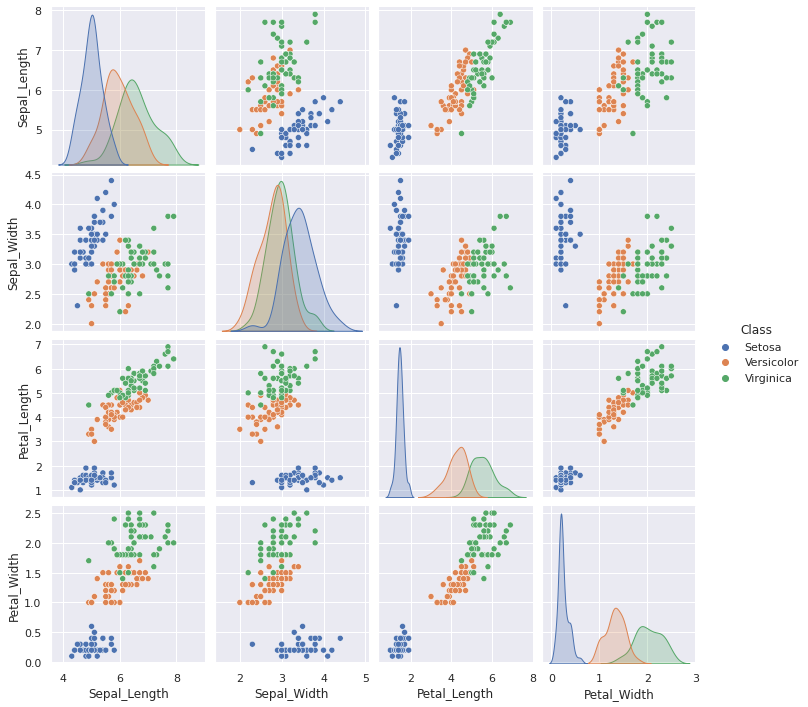

In [93]:
sns.pairplot(df, hue='Class')

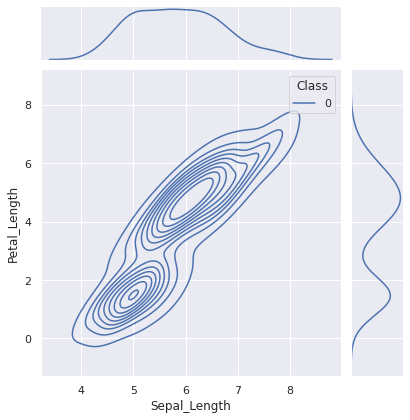

In [102]:
sns.jointplot(data=df, x="Sepal_Length", y="Petal_Length", hue="Class",kind="kde")

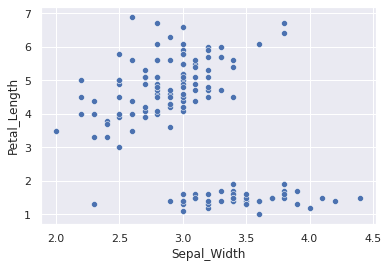

In [107]:
sns.scatterplot(x ='Sepal_Width',y = 'Petal_Length', data =df)


# Task 6: Train, Test Split

In [108]:
from sklearn.model_selection import train_test_split

In [147]:
X = df.iloc[:, [0, 2]].values
y = df.iloc[: -3].values

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Task 7: Conduct Logistic Regression:

https://en.wikipedia.org/wiki/Gradient_descent

https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21



In [140]:
from sklearn.linear_model import LogisticRegression

In [143]:
classifier = LogisticRegression(random_state = 0)

In [ ]:
classifier.fit(X_train, y_train)

# Task 8: Making Predictions:

In [ ]:
y_pred = classifier.predict(X_test)